# Excesive deaths in COVID year

Data from [Eurostat](https://ec.europa.eu/eurostat/data/database?node_code=demomwk)


In [1]:
import pandas as pd 
import re
import matplotlib.pyplot as plt

In [2]:
# download model if neccesary
import urllib.request
urllib.request.urlretrieve("https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/demo_r_mwk_05.tsv.gz", "demo_r_mwk_05.tsv.gz")

('demo_r_mwk_05.tsv.gz', <http.client.HTTPMessage at 0x7f1a7eb50400>)

In [3]:
# Select statistic: e.g. TOTAL,T,NR,SK or Y30-34,T,NR,SK or TOTAL,T,NR,ES
KEY = "TOTAL,T,NR,SK"

In [4]:
df = pd.read_csv("demo_r_mwk_05.tsv.gz",sep='\t')
df.head()

,"age,sex,unit,geo\time",2021W99,2021W02,2021W01,2020W99,2020W53,2020W52,2020W51,2020W50,2020W49,2020W48,2020W47,2020W46,2020W45,2020W44,2020W43,2020W42,2020W41,2020W40,2020W39,2020W38,2020W37,2020W36,2020W35,2020W34,2020W33,2020W32,2020W31,2020W30,2020W29,2020W28,2020W27,2020W26,2020W25,2020W24,2020W23,2020W22,2020W21,2020W20,2020W19,...,2000W40,2000W39,2000W38,2000W37,2000W36,2000W35,2000W34,2000W33,2000W32,2000W31,2000W30,2000W29,2000W28,2000W27,2000W26,2000W25,2000W24,2000W23,2000W22,2000W21,2000W20,2000W19,2000W18,2000W17,2000W16,2000W15,2000W14,2000W13,2000W12,2000W11,2000W10,2000W09,2000W08,2000W07,2000W06,2000W05,2000W04,2000W03,2000W02,2000W01
0,"TOTAL,F,NR,AD",:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:
1,"TOTAL,F,NR,AL",:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,153 p,175 p,202 p,202 p,226 p,243 p,225 p,268 p,239 p,205 p,196 p,210 p,245 p,118 p,176 p,146 p,161 p,156 p,188 p,196 p,198 p,...,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:
2,"TOTAL,F,NR,AM",:,:,:,:,:,:,:,:,:,563 p,582 p,541 p,534 p,424 p,339 p,247 p,234 p,200 p,215 p,213 p,234 p,233 p,221 p,245 p,239 p,241 p,287 p,330 p,251 p,337 p,301 p,321 p,320 p,316 p,327 p,199 p,273 p,267 p,256 p,...,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:,:
3,"TOTAL,F,NR,AT",:,:,:,:,:,1108 p,1181 p,1273 p,1319 p,1203 p,1169 p,1134 p,979 p,947 p,895 p,799 p,820 p,805 p,761 p,782 p,769 p,785 p,755 p,762 p,813 p,733 p,792 p,695 p,752 p,719 p,754 p,736 p,719 p,752 p,750 p,737 p,727 p,738 p,752 p,...,739,704,678,768,615,677,789,845,726,722,689,716,701,707,716,715,757,752,652,713,713,660,678,736,758,821,783,789,806,812,834,874,908,914,967,1071,1076,1141,1062,1053
4,"TOTAL,F,NR,BE",:,:,:,:,1234 p,1336 p,1364 p,1385 p,1397 p,1474 p,1584 p,1742 p,1837 p,1544 p,1310 p,1039 p,1028 p,954 p,990 p,1021 p,916 p,956 p,972 p,1116 p,1562 p,1049 p,1020 p,922 p,937 p,866 p,899 p,990 p,922 p,989 p,983 p,1015 p,1057 p,1061 p,1254 p,...,950,942,928,879,909,867,918,970,958,949,971,884,871,971,959,1059,919,943,895,880,878,967,940,1006,975,979,944,947,930,993,1022,1059,1051,1103,1147,1172,1324,1369,1387,1434


In [5]:
df = df.rename(columns={ df.columns[0]: "key"})
df.columns

Index(['key', '2021W99 ', '2021W02 ', '2021W01 ', '2020W99 ', '2020W53 ',
       '2020W52 ', '2020W51 ', '2020W50 ', '2020W49 ',
       ...
       '2000W10 ', '2000W09 ', '2000W08 ', '2000W07 ', '2000W06 ', '2000W05 ',
       '2000W04 ', '2000W03 ', '2000W02 ', '2000W01 '],
      dtype='object', length=1121)

In [6]:
keys = df.iloc[:, 0]
keys

0       TOTAL,F,NR,AD
1       TOTAL,F,NR,AL
2       TOTAL,F,NR,AM
3       TOTAL,F,NR,AT
4       TOTAL,F,NR,BE
            ...      
2268    Y_LT5,T,NR,RS
2269    Y_LT5,T,NR,SE
2270    Y_LT5,T,NR,SI
2271    Y_LT5,T,NR,SK
2272    Y_LT5,T,NR,UK
Name: key, Length: 2273, dtype: object

In [7]:
svk_keys = keys[keys.map(lambda k: "SK" in k and ",T," in k)]
svk_keys

107      TOTAL,T,NR,SK
216        UNK,T,NR,SK
324     Y10-14,T,NR,SK
432     Y15-19,T,NR,SK
540     Y20-24,T,NR,SK
648     Y25-29,T,NR,SK
756     Y30-34,T,NR,SK
864     Y35-39,T,NR,SK
972     Y40-44,T,NR,SK
1080    Y45-49,T,NR,SK
1188      Y5-9,T,NR,SK
1296    Y50-54,T,NR,SK
1404    Y55-59,T,NR,SK
1512    Y60-64,T,NR,SK
1620    Y65-69,T,NR,SK
1728    Y70-74,T,NR,SK
1836    Y75-79,T,NR,SK
1945    Y80-84,T,NR,SK
2054    Y85-89,T,NR,SK
2163    Y_GE90,T,NR,SK
2271     Y_LT5,T,NR,SK
Name: key, dtype: object

In [8]:
def normalize_number(x): 
    if ":" in x:
        return pd.NA 
    return int(re.search(r'\d+', x).group())

normalize_number("11 p")

11

In [9]:
def extract_week(label):
    return int(re.search(r'W(\d+)', label).group(1))

extract_week("2001W51 ")

51

In [10]:
def extract_year(label):
    return int(re.search(r'20\d+', label).group())

extract_year("2001W51 ")

2001

In [11]:
def plot2020(df, title):
    fig, ax = plt.subplots()
    df.plot(figsize=(20,12), title=title, 
        lw=1, fontsize=16, ax=ax, grid=True)

    for line in ax.get_lines():
        if line.get_label() == '2020':
            line.set_linewidth(5)
    ax.set(xlabel="Týždeň")
    plt.show()

# Total deaths

In [12]:
total = df[df["key"] == KEY]
total = total.drop("key", axis=1)
total = total.rename(lambda x: 'total', axis=0)
total = total.applymap(normalize_number)
total = total.transpose(copy=True).sort_index()
# filter dummy W99 and 200? years
total = total[total.index.map(lambda x: not ("W99" in x or "200" in x))]
total = total.dropna()
total

,total
2010W01,1000
2010W02,996
2010W03,1097
2010W04,1145
2010W05,1103
...,...
2020W44,1336
2020W45,1409
2020W46,1384
2020W47,1338


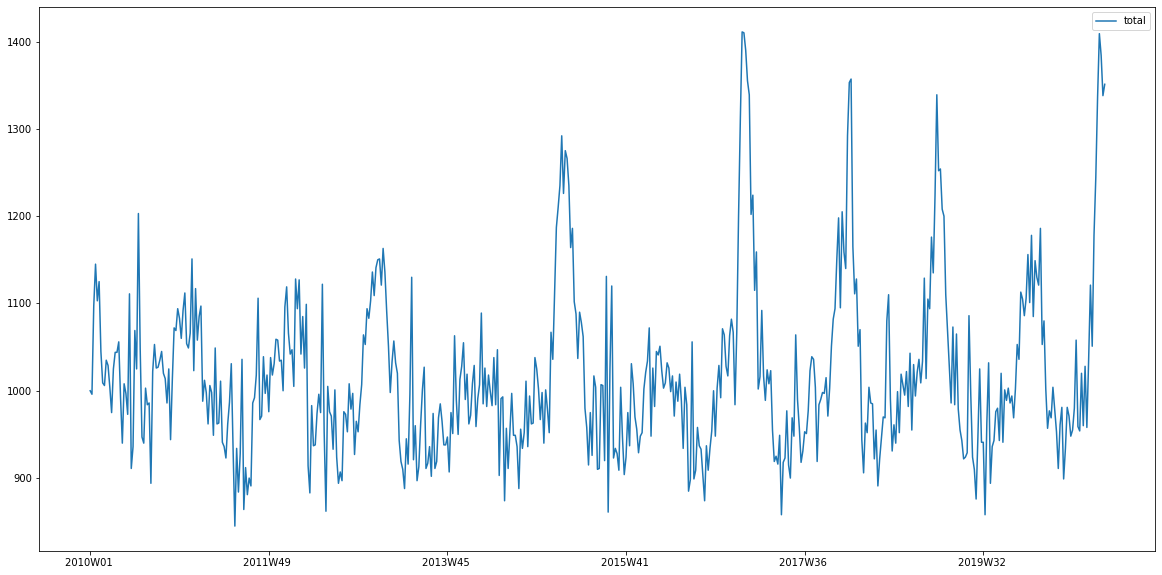

In [13]:
total.plot(figsize=(20,10))

In [14]:
weeks = pd.DataFrame(index=range(1, 54))
for index, row in total.iterrows():
#     print(index, row["total"])
    w = extract_week(index)
    y = extract_year(index)
    weeks.at[w, y]=row["total"]

weeks


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,1000.0,1092.0,1059.0,1083.0,1028.0,1112.0,1072.0,1411.0,1094.0,1105.0,1113.0
2,996.0,1112.0,1058.0,1103.0,1055.0,1187.0,948.0,1410.0,1150.0,1094.0,1105.0
3,1097.0,1054.0,1034.0,1136.0,990.0,1210.0,1026.0,1390.0,1198.0,1176.0,1086.0
4,1145.0,1049.0,1035.0,1109.0,1019.0,1235.0,982.0,1355.0,1095.0,1135.0,1106.0
5,1103.0,1066.0,1000.0,1141.0,962.0,1292.0,1045.0,1339.0,1205.0,1224.0,1156.0
6,1125.0,1151.0,1096.0,1150.0,972.0,1226.0,1041.0,1202.0,1159.0,1339.0,1101.0
7,1045.0,1023.0,1119.0,1151.0,1008.0,1275.0,1051.0,1224.0,1140.0,1252.0,1178.0
8,1009.0,1117.0,1066.0,1121.0,1029.0,1266.0,1023.0,1115.0,1292.0,1254.0,1085.0
9,1006.0,1058.0,1042.0,1163.0,959.0,1235.0,1003.0,1159.0,1353.0,1208.0,1149.0
10,1035.0,1085.0,1047.0,1136.0,991.0,1164.0,1009.0,1002.0,1357.0,1200.0,1130.0


In [15]:
weeks["avg"] = weeks.mean(axis=1)
weeks

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,avg
1,1000.0,1092.0,1059.0,1083.0,1028.0,1112.0,1072.0,1411.0,1094.0,1105.0,1113.0,1106.272727
2,996.0,1112.0,1058.0,1103.0,1055.0,1187.0,948.0,1410.0,1150.0,1094.0,1105.0,1110.727273
3,1097.0,1054.0,1034.0,1136.0,990.0,1210.0,1026.0,1390.0,1198.0,1176.0,1086.0,1127.000000
4,1145.0,1049.0,1035.0,1109.0,1019.0,1235.0,982.0,1355.0,1095.0,1135.0,1106.0,1115.000000
5,1103.0,1066.0,1000.0,1141.0,962.0,1292.0,1045.0,1339.0,1205.0,1224.0,1156.0,1139.363636
6,1125.0,1151.0,1096.0,1150.0,972.0,1226.0,1041.0,1202.0,1159.0,1339.0,1101.0,1142.000000
7,1045.0,1023.0,1119.0,1151.0,1008.0,1275.0,1051.0,1224.0,1140.0,1252.0,1178.0,1133.272727
8,1009.0,1117.0,1066.0,1121.0,1029.0,1266.0,1023.0,1115.0,1292.0,1254.0,1085.0,1125.181818
9,1006.0,1058.0,1042.0,1163.0,959.0,1235.0,1003.0,1159.0,1353.0,1208.0,1149.0,1121.363636
10,1035.0,1085.0,1047.0,1136.0,991.0,1164.0,1009.0,1002.0,1357.0,1200.0,1130.0,1105.090909


In [16]:
week_diff = pd.DataFrame(index=range(1, 54))
for i in weeks.columns:
    if (i == 'avg'):
        continue
    week_diff[i]=weeks[i]-weeks['avg']
    
week_diff

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,-106.272727,-14.272727,-47.272727,-23.272727,-78.272727,5.727273,-34.272727,304.727273,-12.272727,-1.272727,6.727273
2,-114.727273,1.272727,-52.727273,-7.727273,-55.727273,76.272727,-162.727273,299.272727,39.272727,-16.727273,-5.727273
3,-30.000000,-73.000000,-93.000000,9.000000,-137.000000,83.000000,-101.000000,263.000000,71.000000,49.000000,-41.000000
4,30.000000,-66.000000,-80.000000,-6.000000,-96.000000,120.000000,-133.000000,240.000000,-20.000000,20.000000,-9.000000
5,-36.363636,-73.363636,-139.363636,1.636364,-177.363636,152.636364,-94.363636,199.636364,65.636364,84.636364,16.636364
6,-17.000000,9.000000,-46.000000,8.000000,-170.000000,84.000000,-101.000000,60.000000,17.000000,197.000000,-41.000000
7,-88.272727,-110.272727,-14.272727,17.727273,-125.272727,141.727273,-82.272727,90.727273,6.727273,118.727273,44.727273
8,-116.181818,-8.181818,-59.181818,-4.181818,-96.181818,140.818182,-102.181818,-10.181818,166.818182,128.818182,-40.181818
9,-115.363636,-63.363636,-79.363636,41.636364,-162.363636,113.636364,-118.363636,37.636364,231.636364,86.636364,27.636364
10,-70.090909,-20.090909,-58.090909,30.909091,-114.090909,58.909091,-96.090909,-103.090909,251.909091,94.909091,24.909091


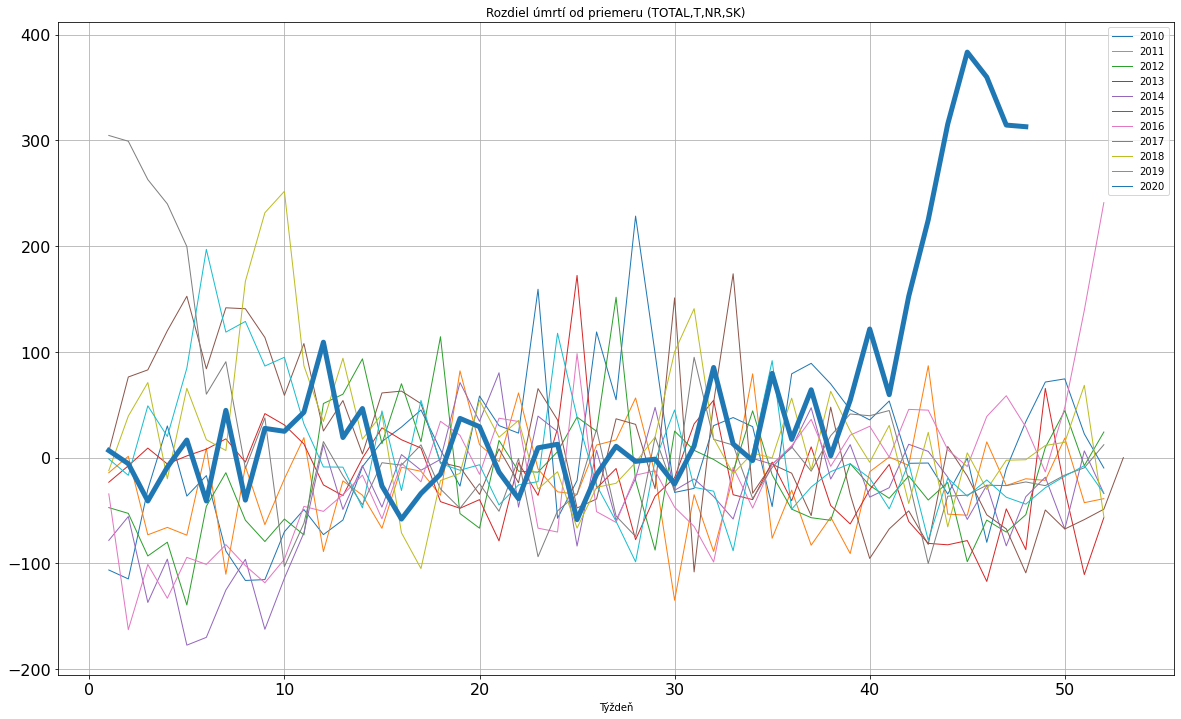

In [17]:
# week_diff.plot(figsize=(20,10))
plot2020(week_diff, 'Rozdiel úmrtí od priemeru (' + KEY + ')')

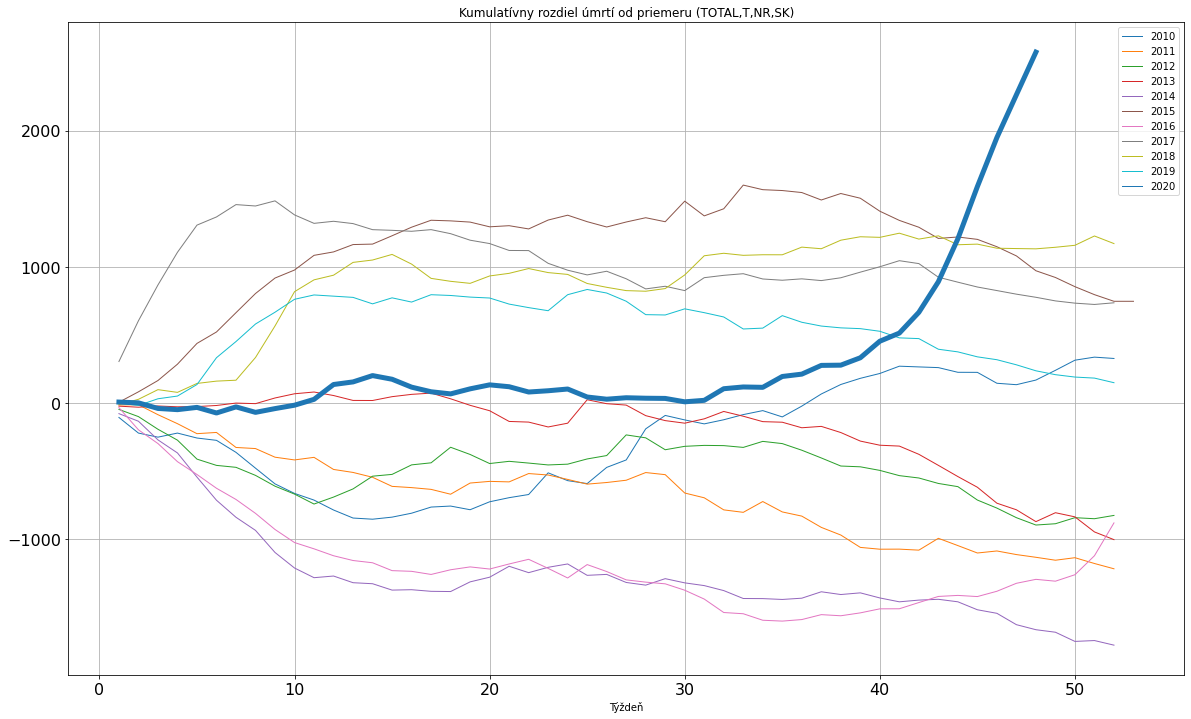

In [18]:
plot2020(week_diff.cumsum(), 'Kumulatívny rozdiel úmrtí od priemeru (' + KEY + ')')